# LIBRARY

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_classif
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

# DATA

In [3]:
path1 = "/kaggle/input/student-performance-data-set/student/student-mat.csv"
data0 = pd.read_csv(path1, sep = ";")
pd.set_option('display.max_columns', None)
display(data0.head(), data0.info(), data0.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

None

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [4]:
data0.shape

(395, 33)

## Informasi Data

In [5]:
path2 = "/kaggle/input/student-performance-data-set/student/student.txt"
file = open(path2, "r")
meta = file.read()
print(meta)

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

# PREPROCESSING & EDA

## Labelling Data
* yes -> 1
* no -> 0

In [6]:
data1 = data0.copy()
data1[data1.columns[15:23]] = data1[data1.columns[15:23]].replace({"yes": 1, "no": 0})
data1["famsize"] = data1["famsize"].replace({"LE3": 0, "GT3": 1})

data1.head().transpose()

0        1        2         3       4
school           GP       GP       GP        GP      GP
sex               F        F        F         F       F
age              18       17       15        15      16
address           U        U        U         U       U
famsize           1        1        0         1       1
Pstatus           A        T        T         T       T
Medu              4        1        1         4       3
Fedu              4        1        1         2       3
Mjob        at_home  at_home  at_home    health   other
Fjob        teacher    other    other  services   other
reason       course   course    other      home    home
guardian     mother   father   mother    mother  father
traveltime        2        1        1         1       1
studytime         2        2        2         3       2
failures          0        0        3         0       0
schoolsup         1        0        1         0       0
famsup            0        1        0         1       1
paid              0        0        1         1       1
activities        0        0        0         1       0
nursery           1        0        1         1       1
higher            1        1        1         1       1
internet          0        1        1         1       0
romantic          0        0        0         1       0
famrel            4        5        4         3       4
freetime          3        3        3         2       3
goout             4        3        2         2       2
Dalc              1        1        2         1       1
Walc              1        1        3         1       2
health            3        3        3         5       5
absences          6        4       10         2       4
G1                5        5        7        15       6
G2                6        5        8        14      10
G3                6        6       10        15      10

## Pengecekan Missing Values

0

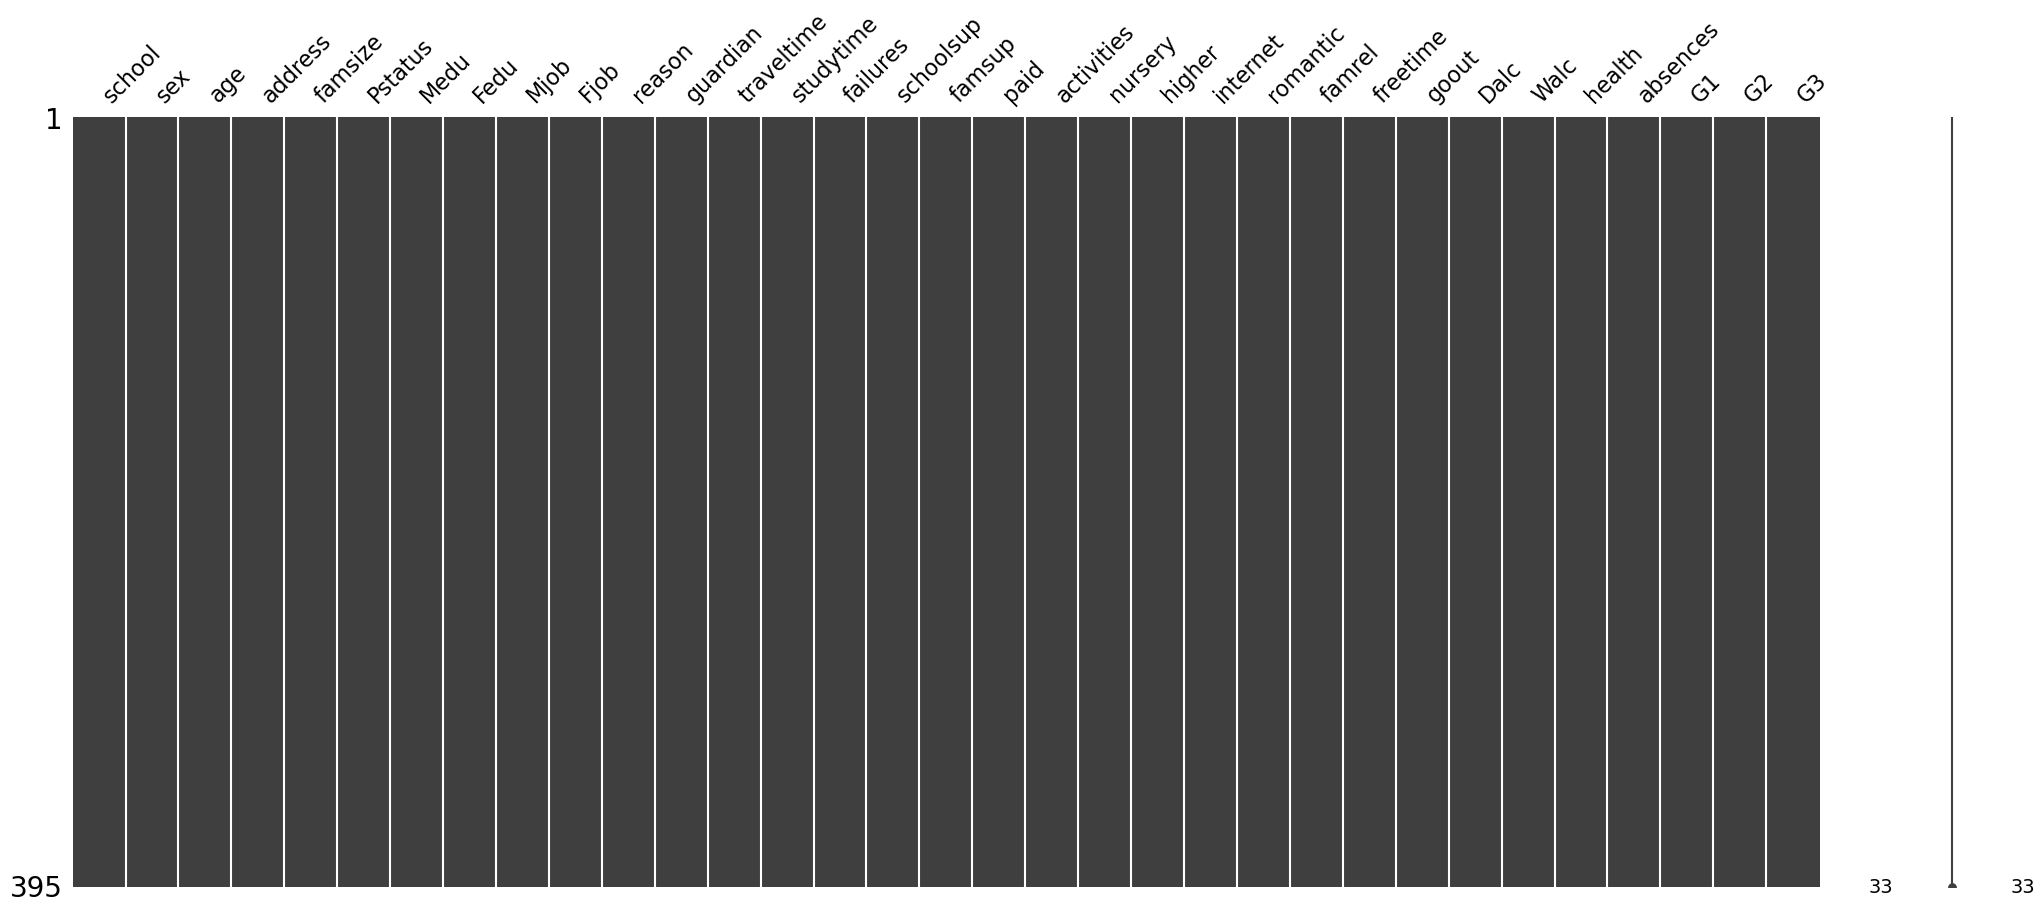

In [7]:
msno.matrix(data1)
data1.duplicated().sum()
# plt.savefig("/kaggle/working/na_plot")

## Profile Report Atribut

In [8]:
from pandas_profiling import ProfileReport
import IPython

report = ProfileReport(data1)
IPython.display.display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# MODELLING

### Encoding and Splitting Data

school sex  age address  famsize Pstatus  Medu  Fedu  Mjob  Fjob  reason  \
210     GP   F   19       U        1       T     3     3     1     1       1   
75      GP   M   15       U        1       T     4     3     4     1       0   
104     GP   M   15       U        1       A     3     4     2     1       3   
374     MS   F   18       R        0       T     4     4     1     1       1   
16      GP   F   16       U        1       T     4     4     2     2       1   
..     ...  ..  ...     ...      ...     ...   ...   ...   ...   ...     ...   
71      GP   M   15       U        1       T     4     2     1     1       3   
106     GP   F   15       U        1       T     2     2     1     1       3   
270     GP   F   19       U        1       T     3     3     1     2       0   
348     GP   F   17       U        1       T     4     3     3     1       1   
102     GP   M   15       U        1       T     4     4     2     1       3   

    guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
210    other           1          4         0          0       1     1   
75    mother           1          2         0          0       1     1   
104   mother           1          2         0          0       1     1   
374   mother           2          3         0          0       0     0   
16    mother           1          3         0          0       1     1   
..       ...         ...        ...       ...        ...     ...   ...   
71    mother           1          4         0          0       0     0   
106   mother           1          4         0          1       1     1   
270    other           1          2         2          0       1     1   
348   mother           1          3         0          0       1     1   
102   mother           1          1         0          0       1     0   

     activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
210           1        1       1         1         0       4         3      3   
75            1        1       1         1         0       4         3      3   
104           1        1       1         1         0       5         4      4   
374           0        1       1         1         0       5         4      4   
16            1        1       1         1         0       3         2      3   
..          ...      ...     ...       ...       ...     ...       ...    ...   
71            0        1       1         1         0       3         3      3   
106           0        1       1         1         0       5         1      2   
270           1        1       1         1         0       4         3      5   
348           1        1       1         1         1       4         4      3   
102           1        0       1         1         0       5         3      3   

     Dalc  Walc  health  absences  G1  difG  
210     1     2       3        10   8     0  
75      2     3       5         6   9     0  
104     1     1       1         0  16     2  
374     1     1       1         0  19    -1  
16      1     2       2         6  13     1  
..    ...   ...     ...       ...  ..   ...  
71      1     1       3         0  10     0  
106     1     1       3         8   7     1  
270     3     3       5        15   9     0  
348     1     3       4         0  13     2  
102     1     1       5         4  10     3  

[300 rows x 32 columns]

school sex  age address  famsize Pstatus  Medu  Fedu  Mjob  Fjob  reason  \
78      GP   M   17       U        1       T     2     1     1     1       0   
371     MS   M   18       R        0       T     1     2     0     2       2   
248     GP   M   18       R        0       T     3     3     1     2       3   
55      GP   F   16       U        1       A     2     1     1     1       2   
390     MS   M   20       U        0       A     2     2     2     2       3   
..     ...  ..  ...     ...      ...     ...   ...   ...   ...   ...     ...   
320     GP   F   17       U        1       A     4     3     2     2       3   
175     GP   M   17       U        0       T     4     3     4     1       3   
238     GP   F   17       R        1       T     2     1     0     2       3   
368     MS   F   18       U        1       T     2     3     0     2       3   
367     MS   F   17       R        1       T     1     1     1     2       1   

    guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
78    mother           2          1         3          1       1     0   
371   father           3          1         0          0       1     1   
248   mother           1          2         1          0       1     0   
55    mother           1          2         0          0       0     1   
390    other           1          2         2          0       1     1   
..       ...         ...        ...       ...        ...     ...   ...   
320   mother           1          2         0          0       1     1   
175   mother           2          2         0          0       0     1   
238   mother           3          2         0          0       0     0   
368   father           2          1         0          0       1     1   
367   mother           3          1         1          0       1     1   

     activities  nursery  higher  internet  romantic  famrel  freetime  goout  \
78            1        1       0         1         0       4         5      1   
371           1        1       0         1         1       4         3      3   
248           0        1       1         1         1       4         3      3   
55            1        1       1         1         1       5         3      4   
390           0        1       1         0         0       5         5      4   
..          ...      ...     ...       ...       ...     ...       ...    ...   
320           0        1       1         1         1       5         2      2   
175           1        1       1         1         0       4         4      4   
238           1        1       1         0         0       2         1      1   
368           0        1       1         1         1       5         2      3   
367           0        1       1         1         1       5         2      1   

     Dalc  Walc  health  absences  G1  difG  
78      1     1       3         2   8     0  
371     2     3       3         3  14    -2  
248     1     3       5         8   3     2  
55      1     1       2         8   8     1  
390     4     5       4        11   9     0  
..    ...   ...     ...       ...  ..   ...  
320     1     2       5        23  13     0  
175     4     4       4         4  10    -1  
238     1     1       3         2  13    -2  
368     1     2       4         0  11    -1  
367     1     2       1         0   7    -1  

[95 rows x 32 columns]

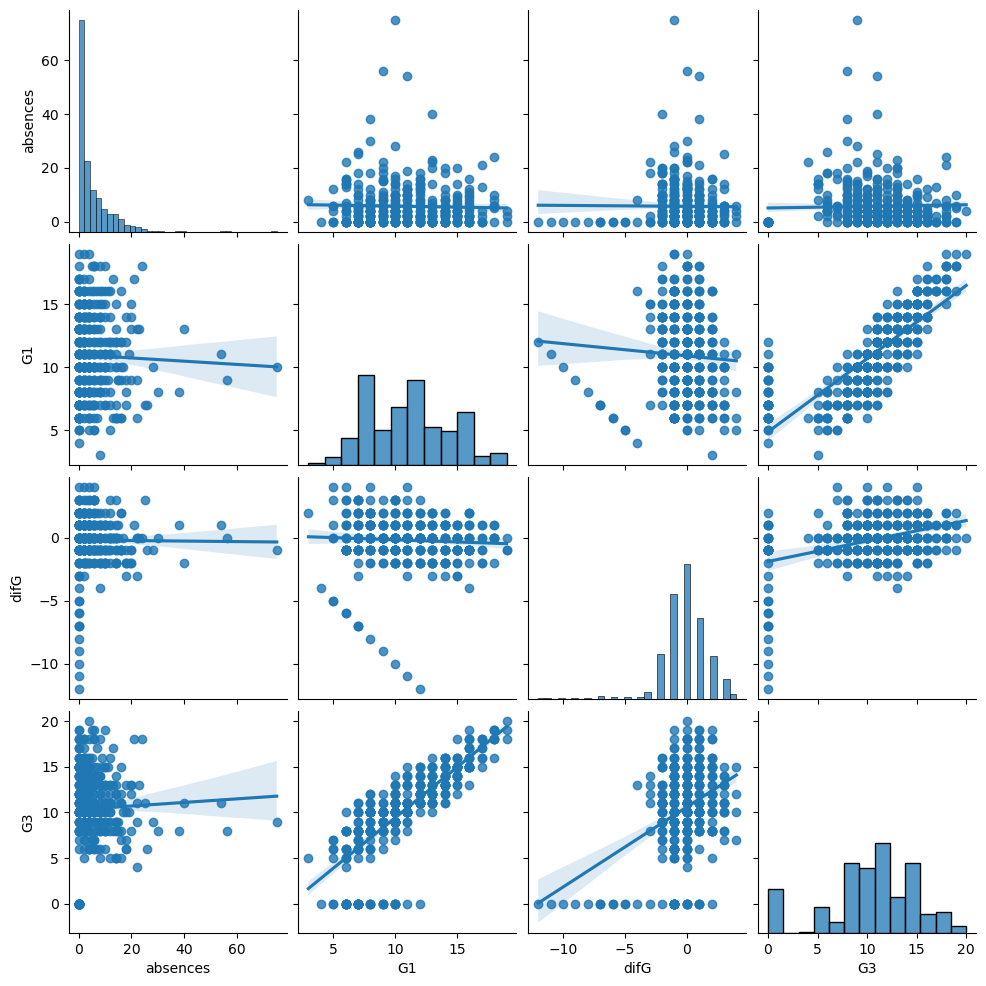

In [9]:
X = data1.copy()

X["Mjob"] = X["Mjob"].replace(X["Mjob"].value_counts().index, [1,2,0,4,3])
X["Fjob"] = X["Fjob"].replace(X["Fjob"].value_counts().index, [1,2,4,0,3])
X["reason"] = X["reason"].replace(X["reason"].value_counts().index, [3,0,1,2])
X["difG"] = X["G2"] - X["G1"]


X.drop(columns="G2", inplace=True)

sns.pairplot(X.loc[:,["absences", "G1", "difG", "G3"]], kind="reg")
y = X.pop("G3")

X_train, X_uji, y_train, y_uji = train_test_split(X, y, test_size = 0.24, random_state = 42)
display(X_train, X_uji)

In [10]:
X1 = X_train.copy()
y1 = y_train.copy()

kat_kol = X1.select_dtypes("object").columns
num_kol = X1.select_dtypes(exclude="object").columns

# ordinal encoder
kat_trf1 = Pipeline(steps=[
    ("kat_en", OrdinalEncoder())
])

# one hot encoder
kat_trf2 = Pipeline(steps=[
    ("kat_en", OneHotEncoder(drop="if_binary"))
])

num_trf = Pipeline(steps=[("num_im", SimpleImputer(strategy="median"))])

# merge preprocessing
pre_1 = ColumnTransformer(transformers=[
    ('kat', kat_trf1, kat_kol),
    ('num', num_trf, num_kol)
])

pre_2 = ColumnTransformer(transformers=[
    ('kat', kat_trf2, kat_kol),
    ('num', num_trf, num_kol)
])

## Features Selection

G1            0.913858
absences      0.637672
difG          0.297574
age           0.166504
failures      0.148563
health        0.139251
Mjob          0.132230
Walc          0.126504
freetime      0.116066
Fedu          0.115201
goout         0.114291
Dalc          0.111272
famrel        0.101141
Medu          0.097232
reason        0.095312
Fjob          0.090060
studytime     0.089085
romantic      0.062038
schoolsup     0.060656
traveltime    0.059352
paid          0.057096
internet      0.055721
Name: MI Scores, dtype: float64

Index(['G1', 'absences', 'difG', 'age', 'failures', 'health', 'Mjob', 'Walc',
       'freetime', 'Fedu', 'goout', 'Dalc', 'famrel', 'Medu', 'reason', 'Fjob',
       'studytime', 'romantic', 'schoolsup', 'traveltime', 'paid', 'internet'],
      dtype='object')

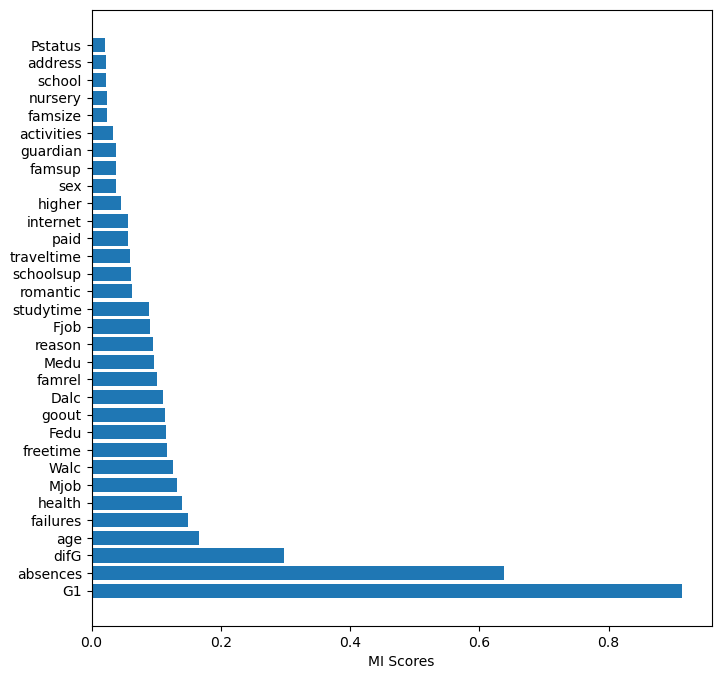

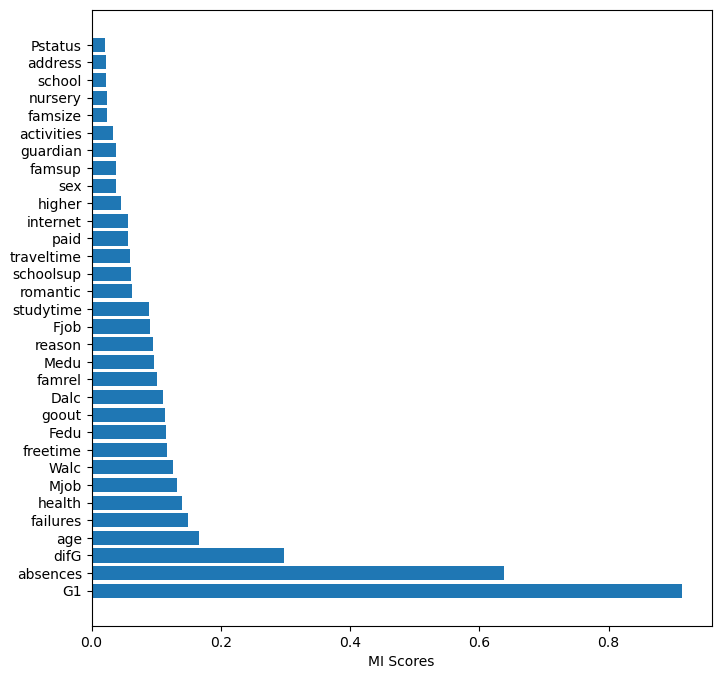

In [11]:
# feature importances, cant do for 2 label, right?

def make_mi_scores(X, y, rs=11, ma=pre_1, use=True):
    X2 = ma.fit_transform(X)
    kol = X.columns
    if use:
        kol = [j.split("__")[1] for j in ma.get_feature_names_out()]
    mi_scores = mutual_info_classif(X2, y, discrete_features=True, random_state=rs)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=kol)
    mi_scores = mi_scores.sort_values(ascending=False)
    
    mm = mi_scores
    plt.figure(figsize=(8,8))
    ax = plt.barh(y=mm.index, width=mm)
    plt.xlabel("MI Scores")
    return mi_scores

display(make_mi_scores(X1, y1)[:-10])
kolom2 = make_mi_scores(X1, y1)[:-10].index
kolom2
# plt.savefig("/kaggle/working/mi")

In [12]:
X2 = X1[kolom2]
y2 = y1.copy()

kat_kol2 = X2.select_dtypes("object").columns
num_kol2 = X2.select_dtypes(exclude="object").columns

# ordinal encoder
kat_trf2 = Pipeline(steps=[
    ("kat_en", OrdinalEncoder())
])

num_trf2 = Pipeline(steps=[("num_im", SimpleImputer(strategy="median"))])

# merge preprocessing
pre2 = ColumnTransformer(transformers=[
    ('kat', kat_trf2, kat_kol2),
    ('num', num_trf2, num_kol2)
])

## BASELINE MODEL

In [13]:
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline
import pandas as pd

# FOLD
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)

In [14]:
# Define a list of regression models
models = [
    LinearRegression(),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]

res1 = []

for model in models:
    pipa = imbpipeline(steps=[
        ("preprocess", pre_1),
        ("clf", model)
    ])
    
    grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, scoring='neg_root_mean_squared_error', verbose=1)
    
    grid_search.fit(X1, y1)
    
    # Save the model's performance metrics in a dictionary
    result = {
        'Model': type(model).__name__,
        'RMSE1': grid_search.best_score_
    }
    
    # Append the dictionary to the results list
    res1.append(result)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [15]:
# Define a list of regression models
models = [
    LinearRegression(),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]

res2 = []

for model in models:
    pipa = imbpipeline(steps=[
        ("preprocess", pre2),
        ("clf", model)
    ])
    
    grid_search = GridSearchCV(estimator=pipa, param_grid = {}, cv=rkf, scoring='neg_root_mean_squared_error', verbose=1)
    
    grid_search.fit(X2, y1)
    
    # Save the model's performance metrics in a dictionary
    result = {
        'Model': type(model).__name__,
        'RMSE2': grid_search.best_score_
    }
    
    # Append the dictionary to the results list
    res2.append(result)
    pass


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [16]:
performa = pd.DataFrame(res1).join(pd.DataFrame(res2).set_index("Model"), on="Model")
performa.sort_values("RMSE1", ascending=False)

Model     RMSE1     RMSE2
8   GradientBoostingRegressor -1.764912 -1.798852
9                XGBRegressor -1.777519 -1.704573
3                  ElasticNet -1.887039 -1.887039
2                       Lasso -1.904726 -1.904726
7       RandomForestRegressor -1.922044 -1.931490
1                       Ridge -1.932831 -1.859874
0            LinearRegression -1.942391 -1.862979
10              LGBMRegressor -1.964610 -1.990999
5         KNeighborsRegressor -2.240682 -2.262074
4                         SVR -2.332494 -2.287820
6       DecisionTreeRegressor -2.509691 -2.548778

## Hyperparameter Tunning
1. GBM 
1. XGB 
1. RF  
1. EN 
1. RR
1. LGBM
1. LR


> ## GradientBoostingRegressor

In [17]:
gbm1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", GradientBoostingRegressor(random_state=0))
])

gbm2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", GradientBoostingRegressor(random_state=0))
])


param_grid = {
    'clf__n_estimators': [1000],
    'clf__learning_rate': [0.01],
    'clf__max_depth': [5],
    'clf__min_samples_split': [6, 8],
    'clf__min_samples_leaf': [3],
    'clf__subsample': [0.8]
}


grid_gbm1 = GridSearchCV(estimator=gbm1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

param_grid = {
    'clf__n_estimators': [800],
    'clf__learning_rate': [0.01],
    'clf__max_depth': [5],
    'clf__min_samples_split': [6],
    'clf__min_samples_leaf': [3],
    'clf__subsample': [0.8]
}

grid_gbm2 = GridSearchCV(estimator=gbm2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_gbm1.fit(X1, y1)
grid_gbm2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_gbm1.best_params_)
print("Best Scorer", grid_gbm1.best_score_)

print("Best Parameter", grid_gbm2.best_params_)
print("Best Scorer", grid_gbm2.best_score_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 8, 'clf__n_estimators': 1000, 'clf__subsample': 0.8}
Best Scorer -1.7181985438456961
Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 6, 'clf__n_estimators': 800, 'clf__subsample': 0.8}
Best Scorer -1.7439000375229905


```Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 8, 'clf__n_estimators': 1000, 'clf__subsample': 0.8}
Best Scorer -1.7181985438456961
Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 6, 'clf__n_estimators': 800, 'clf__subsample': 0.8}
Best Scorer -1.7439000375229905```

In [18]:
display(pd.DataFrame(grid_gbm1.cv_results_).filter(regex='^mean',axis=1),
        pd.DataFrame(grid_gbm2.cv_results_).filter(regex='^mean',axis=1))

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       1.345412         0.012117      -3.216076       0.843866   
1       1.349734         0.012337      -3.203258       0.844306   

   mean_test_rmse  mean_test_mae  
0       -1.721311      -1.094336  
1       -1.718199      -1.094938

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.996849         0.008839      -3.309406       0.839551   

   mean_test_rmse  mean_test_mae  
0         -1.7439      -1.106141

> ## XGB

In [19]:
xgb1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", XGBRegressor(random_state=0))
])

xgb2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", XGBRegressor(random_state=0))
])

param_grid = {
    'clf__n_estimators': [1000],
    'clf__learning_rate': [0.01],
    'clf__max_depth': [5,7],
    'clf__subsample': [0.8]
}


grid_xgb1 = GridSearchCV(estimator=xgb1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

param_grid = {
    'clf__n_estimators': [1000],
    'clf__learning_rate': [0.01],
    'clf__max_depth': [5,7],
    'clf__subsample': [0.8]
}

grid_xgb2 = GridSearchCV(estimator=xgb2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_xgb1.fit(X1, y1)
grid_xgb2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_xgb1.best_params_)
print("Best Scorer", grid_xgb1.best_score_)

print("Best Parameter", grid_xgb2.best_params_)
print("Best Scorer", grid_xgb2.best_score_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 1000, 'clf__subsample': 0.8}
Best Scorer -1.6934167831414946
Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 1000, 'clf__subsample': 0.8}
Best Scorer -1.6527267233074798


```Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 1000, 'clf__subsample': 0.8}  
Best Scorer -1.6934167831414946   
Best Parameter {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 1000, 'clf__subsample': 0.8}   
Best Scorer -1.6527267233074798```

In [20]:
display(pd.DataFrame(grid_xgb1.cv_results_).filter(regex='^mean',axis=1),
        pd.DataFrame(grid_xgb2.cv_results_).filter(regex='^mean',axis=1))

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.938680         0.012791      -3.153277       0.846264   
1       1.376593         0.014257      -3.079887       0.850017   

   mean_test_rmse  mean_test_mae  
0       -1.713598      -1.098080  
1       -1.693417      -1.084385

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.778147         0.010391      -3.040752        0.85251   
1       1.101534         0.011118      -2.964140        0.85670   

   mean_test_rmse  mean_test_mae  
0       -1.676451      -1.063361  
1       -1.652727      -1.047056

> ## Random Forest

In [21]:
rf1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", RandomForestRegressor(random_state=0))
])

rf2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", RandomForestRegressor(random_state=0,))
])


param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__min_samples_split': [4,5]
}

grid_rf1 = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__min_samples_split': [4,5]
}

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_rf1.fit(X1, y1)
grid_rf2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_rf1.best_params_)
print("Best Scorer", grid_rf1.best_score_)

print("Best Parameter", grid_rf2.best_params_)
print("Best Scorer", grid_rf2.best_score_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameter {'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best Scorer -1.9122164039296181
Best Parameter {'clf__min_samples_split': 4, 'clf__n_estimators': 50}
Best Scorer -1.913929452539005


1.9164```Best Parameter {'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best Scorer -1.9122164039296181
Best Parameter {'clf__min_samples_split': 4, 'clf__n_estimators': 50}
Best Scorer -1.9164153265604813```

In [22]:
display(pd.DataFrame(grid_rf1.cv_results_).filter(regex='^mean',axis=1),
        pd.DataFrame(grid_rf2.cv_results_).filter(regex='^mean',axis=1))

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.172451         0.013925      -3.923475       0.807173   
1       0.305344         0.018301      -3.975987       0.804854   
2       0.162345         0.014021      -3.863063       0.810341   
3       0.299132         0.017354      -3.941598       0.806531   

   mean_test_rmse  mean_test_mae  
0       -1.927317      -1.254645  
1       -1.937865      -1.254228  
2       -1.912216      -1.249270  
3       -1.930076      -1.251440

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.147205         0.010429      -3.874575       0.809430   
1       0.286349         0.015128      -3.922557       0.807215   
2       0.150040         0.010840      -3.884295       0.808922   
3       0.287119         0.015675      -3.953696       0.805773   

   mean_test_rmse  mean_test_mae  
0       -1.913929      -1.244023  
1       -1.924507      -1.244603  
2       -1.916415      -1.245041  
3       -1.932595      -1.246536

> ## Elastic Net

In [23]:
en1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", ElasticNet(random_state=0,))
])

en2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", ElasticNet(random_state=0))
])


param_grid = {
    'clf__alpha': [0.2, 0.3],
    'clf__l1_ratio': [0.8],
    'clf__fit_intercept': [False]
}


grid_en1 = GridSearchCV(estimator=en1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

param_grid = {
    'clf__alpha': [0.2, 0.3],
    'clf__l1_ratio': [0.2],
    'clf__fit_intercept': [False]
}
grid_en2 = GridSearchCV(estimator=en2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_en1.fit(X1, y1)
grid_en2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_en1.best_params_)
print("Best Scorer", grid_en1.best_score_)

print("Best Parameter", grid_en2.best_params_)
print("Best Scorer", grid_en2.best_score_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameter {'clf__alpha': 0.2, 'clf__fit_intercept': False, 'clf__l1_ratio': 0.8}
Best Scorer -1.792554560369446
Best Parameter {'clf__alpha': 0.3, 'clf__fit_intercept': False, 'clf__l1_ratio': 0.2}
Best Scorer -1.8028888029814474


```Best Parameter {'clf__alpha': 0.2, 'clf__fit_intercept': False, 'clf__l1_ratio': 0.8}
Best Scorer -1.792554560369446
Best Parameter {'clf__alpha': 0.3, 'clf__fit_intercept': False, 'clf__l1_ratio': 0.2}
Best Scorer -1.8028888029814474```

In [24]:
display(pd.DataFrame(grid_en1.cv_results_).filter(regex='^mean',axis=1),
        pd.DataFrame(grid_en2.cv_results_).filter(regex='^mean',axis=1))

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.016111         0.008289      -3.489689       0.833966   
1       0.014863         0.007938      -3.513712       0.832909   

   mean_test_rmse  mean_test_mae  
0       -1.792555      -1.134406  
1       -1.797814      -1.124141

mean_fit_time  mean_score_time  mean_test_mse  mean_test_rsq  \
0       0.015169         0.007377      -3.533049       0.831415   
1       0.010886         0.005889      -3.520112       0.832334   

   mean_test_rmse  mean_test_mae  
0       -1.810006      -1.173083  
1       -1.802889      -1.154677

> ## Ridge

In [25]:
rr1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", Ridge(random_state=0))
])

rr2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", Ridge(random_state=0))
])


param_grid = {
    'clf__alpha': [10, 100, 1000],
    'clf__solver': ['lsqr', 'sag', 'saga'],
    'clf__fit_intercept': [True, False]
}

grid_rr1 = GridSearchCV(estimator=rr1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

param_grid = {
    'clf__alpha': [10, 100, 1000],
    'clf__solver': ['lsqr', 'sag', 'saga'],
    'clf__fit_intercept': [True, False]
}

grid_rr2 = GridSearchCV(estimator=rr2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_rr1.fit(X1, y1)
grid_rr2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_rr1.best_params_)
print("Best Scorer", grid_rr1.best_score_)

print("Best Parameter", grid_rr2.best_params_)
print("Best Scorer", grid_rr2.best_score_)


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Parameter {'clf__alpha': 100, 'clf__fit_intercept': False, 'clf__solver': 'saga'}
Best Scorer -1.80785337865716
Best Parameter {'clf__alpha': 100, 'clf__fit_intercept': False, 'clf__solver': 'saga'}
Best Scorer -1.8049450473228965


```Best Parameter {'clf__alpha': 100, 'clf__fit_intercept': False, 'clf__solver': 'saga'}
Best Scorer -1.80785337865716
Best Parameter {'clf__alpha': 100, 'clf__fit_intercept': False, 'clf__solver': 'saga'}
Best Scorer -1.8049450473228965```

> ## LGBM

In [26]:
lgb1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", LGBMRegressor(random_state=0))
])

lgb2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", LGBMRegressor(random_state=0))
])


param_grid = {
    'clf__learning_rate': [0.1],
    'clf__n_estimators': [100,50],
    'clf__max_depth': [4,5],
    'clf__subsample': [0.6],
    'clf__reg_alpha': [0.1],
    'clf__reg_lambda': [0.3]
}

grid_lgb1 = GridSearchCV(estimator=lgb1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")


param_grid = {
    'clf__learning_rate': [0.1],
    'clf__n_estimators': [100, 50],
    'clf__max_depth': [4],
    'clf__subsample': [0.6],
    'clf__reg_alpha': [0.5],
    'clf__reg_lambda': [0]
}

grid_lgb2 = GridSearchCV(estimator=lgb2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_lgb1.fit(X1, y1)
grid_lgb2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_lgb1.best_params_)
print("Best Scorer", grid_lgb1.best_score_)

print("Best Parameter", grid_lgb2.best_params_)
print("Best Scorer", grid_lgb2.best_score_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Parameter {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 50, 'clf__reg_alpha': 0.1, 'clf__reg_lambda': 0.3, 'clf__subsample': 0.6}
Best Scorer -1.9291580763393348
Best Parameter {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 50, 'clf__reg_alpha': 0.5, 'clf__reg_lambda': 0, 'clf__subsample': 0.6}
Best Scorer -1.920183156636173


```Best Parameter {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 50, 'clf__reg_alpha': 0.1, 'clf__reg_lambda': 0.3, 'clf__subsample': 0.8}
Best Scorer -1.9291580763393348
Best Parameter {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 50, 'clf__reg_alpha': 0.5, 'clf__reg_lambda': 0, 'clf__subsample': 0.8}
Best Scorer -1.920183156636173```

> ## Lasso

In [27]:
lr1 = imbpipeline(steps=[
    ("preprocess", pre_1),
    ("clf", Lasso(random_state=0))
])

lr2 = imbpipeline(steps=[
    ("preprocess", pre2),
    ("clf", Lasso(random_state=0))
])


param_grid = {
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
    'clf__fit_intercept': [True, False]
}

grid_lr1 = GridSearchCV(estimator=lr1, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

param_grid = {
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
    'clf__fit_intercept': [True, False]
}

grid_lr2 = GridSearchCV(estimator=lr2, param_grid=param_grid, cv=rkf, scoring={"mse": 'neg_mean_squared_error',
                                                                               "rsq": 'r2',
                                                                               "rmse": 'neg_root_mean_squared_error',
                                                                               "mae": 'neg_mean_absolute_error'}, 
                         verbose = 1, refit="rmse")

# Melakukan tuning hyperparameter
grid_lr1.fit(X1, y1)
grid_lr2.fit(X1, y1)

# Mendapatkan model terbaik
print("Best Parameter", grid_lr1.best_params_)
print("Best Scorer", grid_lr1.best_score_)

print("Best Parameter", grid_lr2.best_params_)
print("Best Scorer", grid_lr2.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameter {'clf__alpha': 0.1, 'clf__fit_intercept': False}
Best Scorer -1.8037960394692867
Best Parameter {'clf__alpha': 0.1, 'clf__fit_intercept': False}
Best Scorer -1.803185235128425


```Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameter {'clf__alpha': 0.1, 'clf__fit_intercept': False}
Best Scorer -1.8037960394692867
Best Parameter {'clf__alpha': 0.1, 'clf__fit_intercept': False}
Best Scorer -1.803185235128425```

# Feature Importance and Performance Test Set
**Best Model: XGB**

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score, r2_score

pred1 = grid_xgb1.predict(X_uji)
pred2 = grid_xgb2.predict(X_uji)

metrik = ["RMSE", "MSE", "MAE", "EV", "R2"]
model1 = [mean_squared_error(y_uji, pred1, squared=False)]
model2 = [mean_squared_error(y_uji, pred2, squared=False)]

for j in [mean_squared_error, mean_absolute_error, explained_variance_score, r2_score]:
    model1.append(j(y_uji, pred1))
    model2.append(j(y_uji, pred2))
    pass    

# evaluasi = pd.DataFrame({"model1":model1, "model2":model2}, index=metrik).transpose()
evaluasi = pd.DataFrame({"Best Model":model2}, index=metrik).transpose()
evaluasi.iloc[:,3:]= evaluasi.iloc[:,3:]*100
round(evaluasi,2)

# choose the simpler model, not that different.

RMSE   MSE   MAE     EV     R2
Best Model  1.86  3.46  1.11  84.68  84.66

<Axes: xlabel='importance', ylabel='feature'>

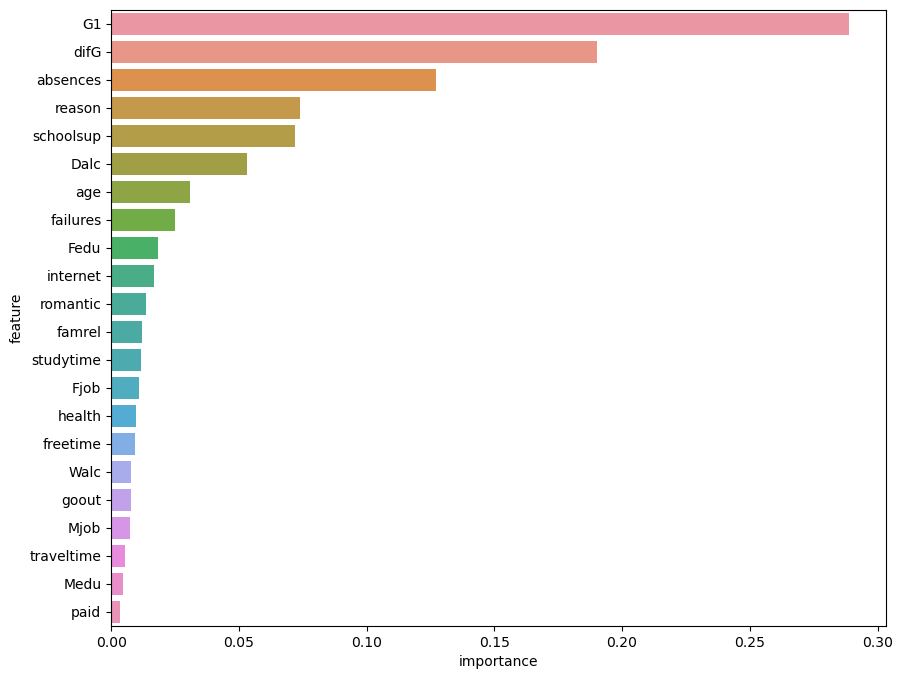

In [29]:
# GOOD FI
# fitur1 = [j.split("__")[1] for j in grid_xgb1.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
# imp1 = pd.DataFrame({'feature': fitur1, 
#                      'importance': grid_xgb1.best_estimator_.named_steps["clf"].feature_importances_})
# imp1 = imp1.sort_values('importance', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(10, 8))
# sns.barplot(x='importance', y='feature', data=imp1)

fitur2 = [j.split("__")[1] for j in grid_xgb2.best_estimator_.named_steps["preprocess"].get_feature_names_out()]
imp2 = pd.DataFrame({'feature': fitur2, 
                     'importance': grid_xgb2.best_estimator_.named_steps["clf"].feature_importances_})
imp2 = imp2.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=imp2)

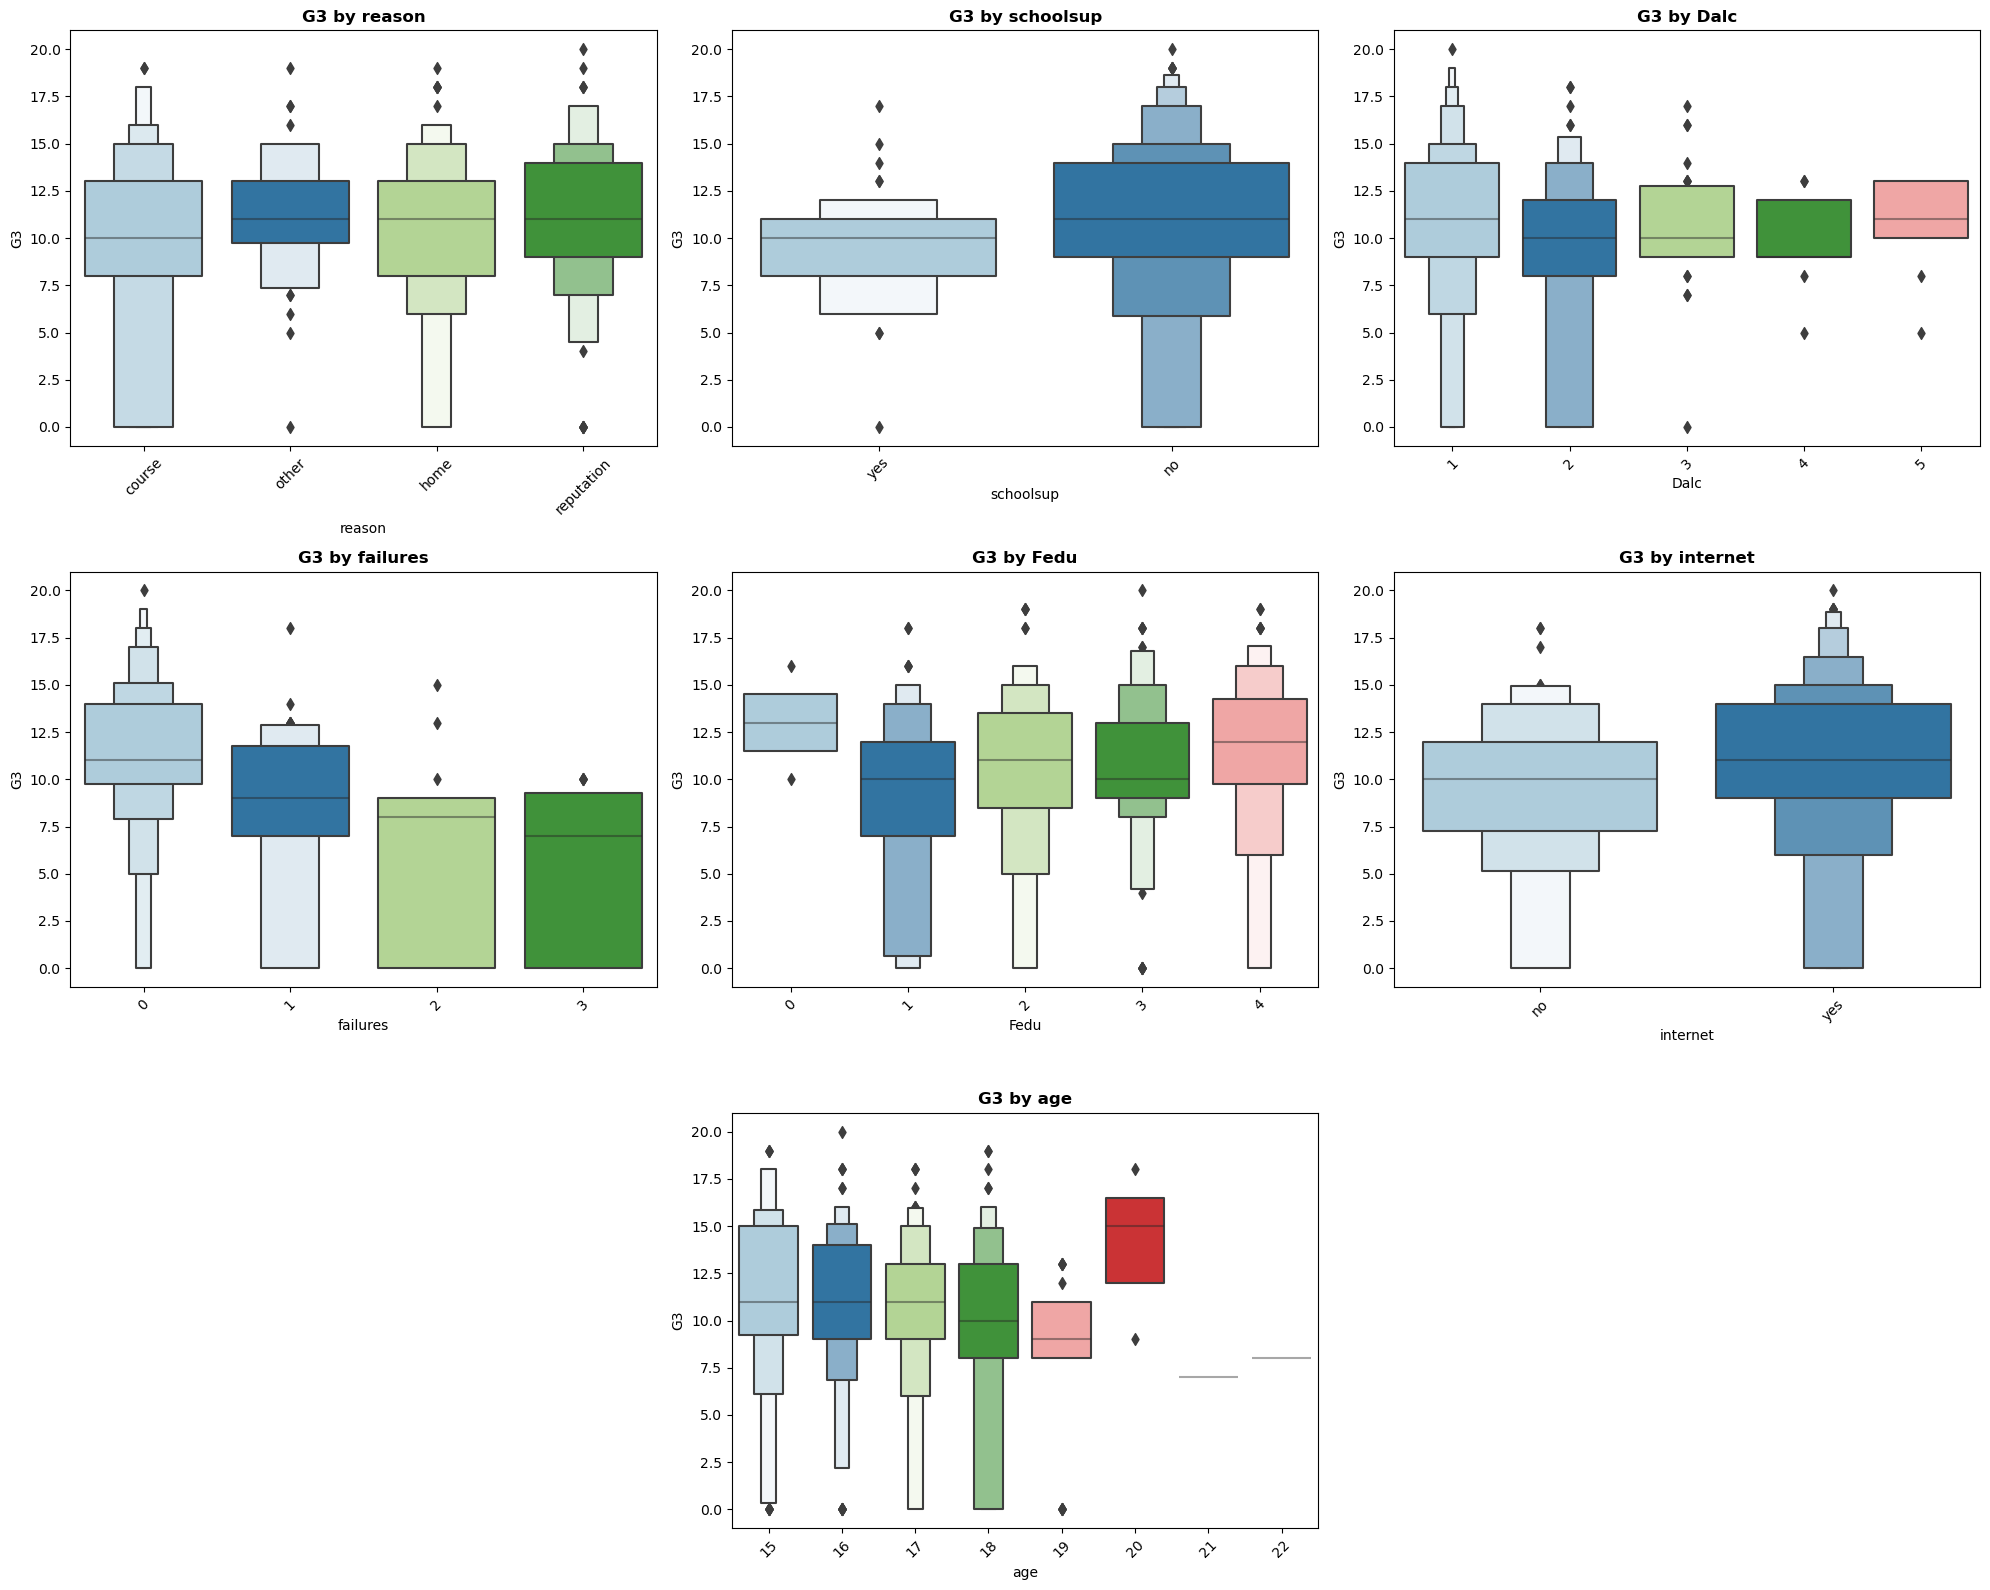

In [30]:
var = ['reason', 'schoolsup', 'Dalc', 'failures', 'Fedu', 'internet', 'age']

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
for i, var in enumerate(var):
    row = i // 3
    col = i % 3
    
    if var != 'age':
        sns.boxenplot(data=data0, x=var, y='G3', ax=axes[row, col], palette='Paired')
        axes[row, col].set_title(f'G3 by {var}', fontsize=12, fontweight='bold')
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel('G3')
        axes[row, col].tick_params(axis='x', rotation=45)
    else:
        sns.boxenplot(data=data0, x=var, y='G3', ax=axes[2, 1], palette='Paired')
        axes[2, 1].set_title(f'G3 by {var}', fontsize=12, fontweight='bold')
        axes[2, 1].set_xlabel(var)
        axes[2, 1].set_ylabel('G3')
        axes[2, 1].tick_params(axis='x', rotation=45)

axes[2, 0].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.savefig('viz1.png', dpi=300)
plt.show()